In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option("display.max_columns", 24)

In [124]:
df_test = pd.read_csv("test.csv", index_col= 0)
df_train = pd.read_csv("train.csv", index_col= 0)
df = pd.concat([df_test, df_train])
df.reset_index(inplace=True, drop = True)
display(df.info(memory_usage = "deep"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

None

In [125]:
df.dropna(inplace=True)

def change_type_to_category(dataframe):
    """Iterates over the columns of data frame and changes dtype from object to category"""
    for column in dataframe.columns:
        if(dataframe.dtypes[column] == "object") and (dataframe[column].nunique() < round(0.1 * len(dataframe[column]))):
            dataframe[column] = dataframe[column].astype("category")
change_type_to_category(df)

df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].astype("int32")

In [126]:
df.dropna(inplace=True)

In [127]:
def change_type_to_int32(dataframe):
    """Iterates over the columns of data frame and changes dtype from int64 to int32 where possible"""
    for column in dataframe.columns:
        if dataframe.dtypes[column] == "int64" and dataframe[column].max() < 2**32:
            dataframe[column] = dataframe[column].astype("int32")
change_type_to_int32(df)

In [128]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 129487 non-null  int32   
 1   Gender                             129487 non-null  category
 2   Customer Type                      129487 non-null  category
 3   Age                                129487 non-null  int32   
 4   Type of Travel                     129487 non-null  category
 5   Class                              129487 non-null  category
 6   Flight Distance                    129487 non-null  int32   
 7   Inflight wifi service              129487 non-null  int32   
 8   Departure/Arrival time convenient  129487 non-null  int32   
 9   Ease of Online booking             129487 non-null  int32   
 10  Gate location                      129487 non-null  int32   
 11  Food and drink                 

In [129]:
display(df.head(3))

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0,neutral or dissatisfied


### Categorical variables analysis using pie charts

In analyzed dataset people are travelling mostly by Eco and Business Class
- 47.9% Eco class
- 44.9% Business class  

Whereas there is only 7.2% of the travelling people by Eco Plus class


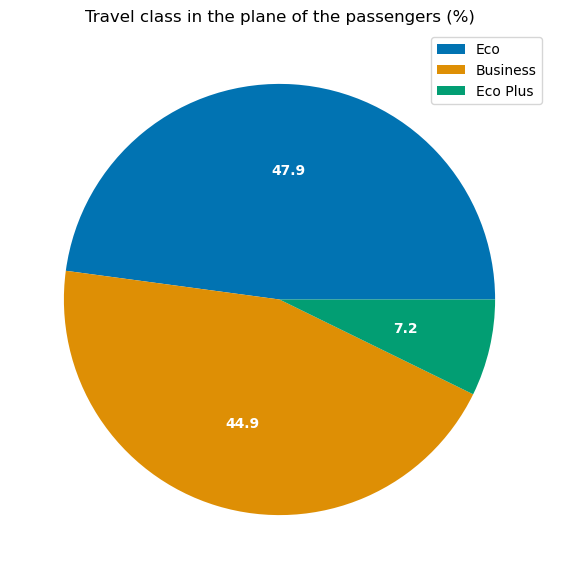

In [130]:
sns.set_palette("colorblind")
fig, ax = plt.subplots(figsize = (10, 7))
ax.pie(df.Class.value_counts(normalize = True), autopct=lambda pct: round(pct, 1), labels=df.Class.unique(), textprops = dict(color ="white", weight = "bold"))
ax.set_title("Travel class in the plane of the passengers (%)", loc = "center")
plt.legend()
plt.show()

Based on the pie plot there is much more people which are considered as loyal customers. In our dataset 81.7% of people are loyal travellers whereas 18.3 are considered not to be loyal. Customer loyalty is really important for the business as understanding of consumers’ perception about various product features helps companies to identify their own strengths and weaknesses. Customer loyalty is an ongoing positive relationship between a customer and a business.  
It’s what drives repeat purchases and prompts existing customers to choose your company over a competitor offering similar benefits.  

You can read more about linkage of loyalty and business retention:
- Modeling of Customer Preferenceson Product Features and Comparing the Competitors’ Performances Prasun Das1,Sandip Mukherjee SQC & OR Unit, Indian Statistical Institute, Kolkata, India M.Tech (QR&OR) Student (2005–07), Indian Statistic Institute, Kolkata, India
- Customer segmentation issues and strategies for a automobile dealership with two clustering techniques, Chih-Fong Tsai, Ya-Han Hu and Yu-Hsin Lu
- https://www.qualtrics.com/experience-management/customer/customer-loyalty/



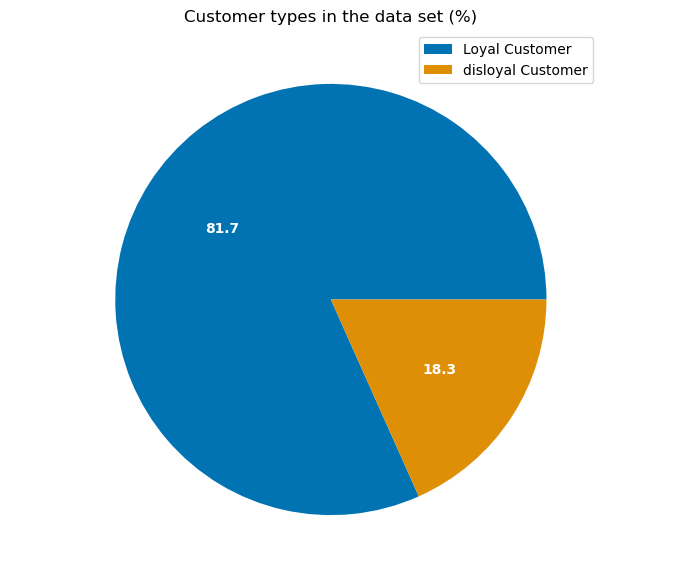

In [131]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.pie(df["Customer Type"].value_counts(normalize = True), autopct=lambda pct: round(pct, 1), labels=df["Customer Type"].unique(), textprops = dict(color ="white", weight = "bold"))
ax.set_title("Customer types in the data set (%)", loc = "center")
plt.legend()
plt.show()

There are two types of travels:
- Business travel (69.1%)
- Personal travel (30.9%)

In our dataset there is twice as much travels which are with the aim of business case comparing to personal travels.  


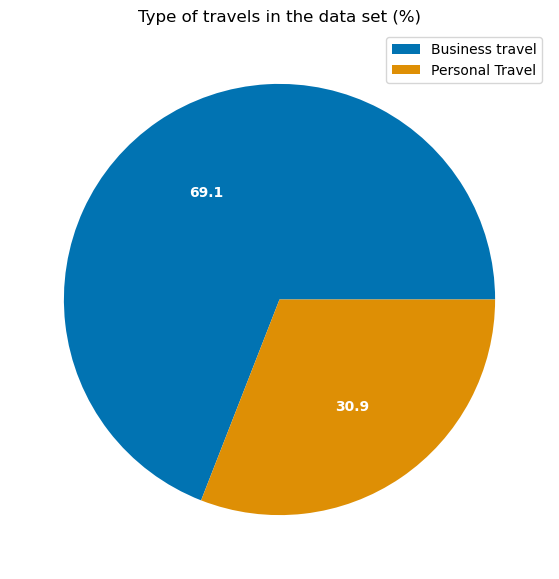

In [132]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.pie(df["Type of Travel"].value_counts(normalize = True), autopct=lambda pct: round(pct, 1), labels=df["Type of Travel"].unique(), textprops = dict(color ="white", weight = "bold"))
ax.set_title("Type of travels in the data set (%)", loc = "center")
plt.legend()
plt.show()

In the data set we do not observe gender gap as we consider only two sexes and the share is:
- Female (50.7%)
- Male (49.3%)  

As it is almost exactly the same number of people in both sexes.

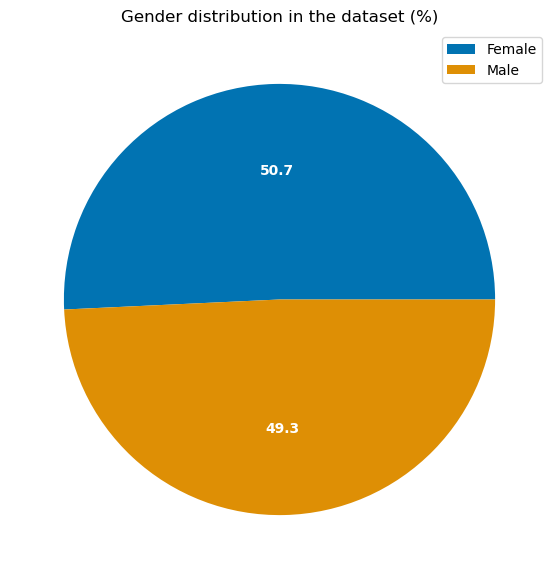

In [133]:
sns.set_palette("colorblind")
fig, ax = plt.subplots(figsize = (10, 7))
ax.pie(df.Gender.value_counts(normalize = True), autopct=lambda pct: round(pct, 1), labels=df.Gender.unique(), textprops = dict(color ="white", weight = "bold"))
ax.set_title("Gender distribution in the dataset (%)", loc = "center")
plt.legend()
plt.show()

When we consider the Airline satisfaction level, there is dichotomous scale for this variable:
- Target level (satisfied)
- Opposite (neutral or dissatisfied)  
 
From the pie plot mentioned below we can observe that:
- satisfied (56.6%)
- neutral or dissatisfied (43.4%)  

Great share of people were neutral or dissatisfied. It will be important to analyze which factors are key to make customers satisfied. This analysis will provide a powerful tool for keeping or making people loyaly customers


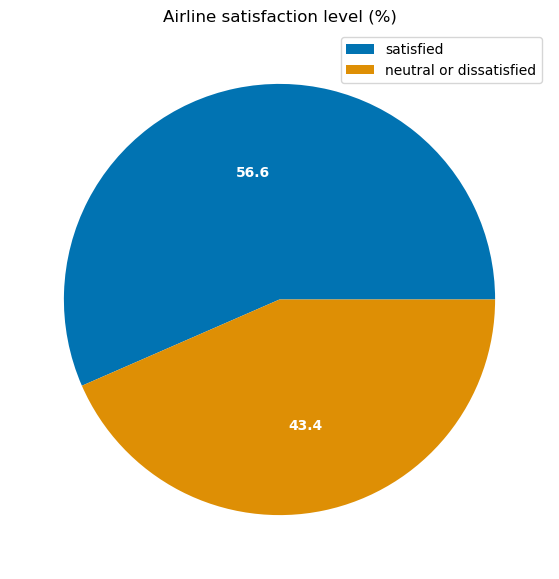

In [134]:
sns.set_palette("colorblind")
fig, ax = plt.subplots(figsize = (10, 7))
ax.pie(df.satisfaction.value_counts(normalize = True), autopct=lambda pct: round(pct, 1), labels=df.satisfaction.unique(), textprops = dict(color ="white", weight = "bold"))
ax.set_title("Airline satisfaction level (%)", loc = "center")
plt.legend()
plt.show()

### Analysis of correlation between numeric variables

To analyse correlation between variables we perform calculation of correlation coefficient matrix for numberic variables in the dataset. Then we plot a heatmap in case of making expert eye judgements. From the plot we can see that most of the variables as not correalated. In further analysis we will zoom a bit onto variables that are highly correlated based on linear Pearson correlation. In this case we will consider two variables as highly correlated when their absolute Pearson correlation coefficient is higher than 0.6. Below list of variables is provided (with coefficient in square brackets)  
- Arrival Delay in Minutes and Departure Delay in Minutes (0.97)
- Ease of Online booking and Inflight wifi service (0.71)
- Cleanliness and Inflight entertainment (0.69)
- Cleanliness and Seat comfort (0.68)
- Cleanliness and Food and drink (0.66)
- Inflight entertainment and Food and drink (0.62)
- Inflight entertainment and Seat comfort (0.61)  

<Axes: >

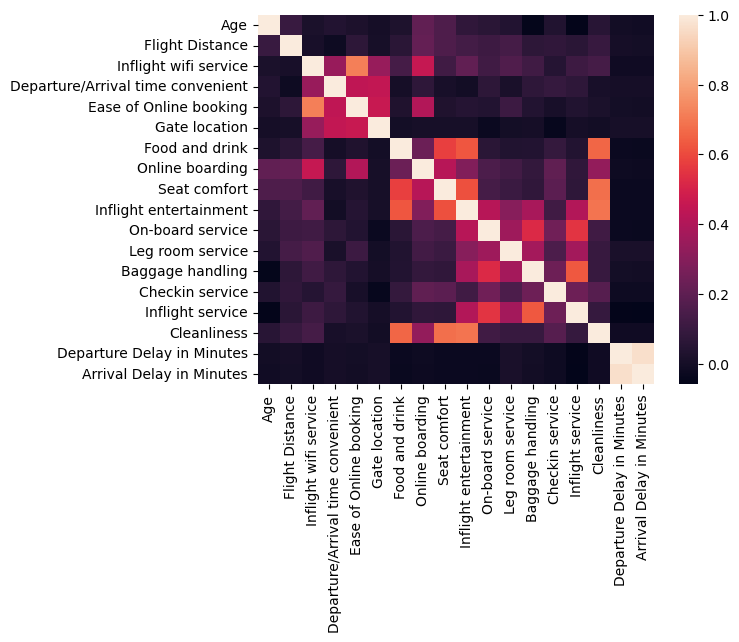

In [135]:
cols = list()
for column in df.columns:
    if df[column].dtype == int and column != "id":
        cols.append(column)
sns.heatmap(df[cols].corr())

Correlation between Arrival Delay in Minutes and Departure Delay in Minutes is natural as those variables are empirically taken as correlated. We would not analyze correlation between those variables anymore. The same problem might occur when we take into consideration satisfaction level of inflight entertainment and variables as seat comfort, food and drink or cleanliness. We may suppose that people being satisfied with seat comfort, food and drink or cleanliness tend to evaluate inflight entertainment much better. It is important to point out that if we want to perform some modelling such as regression or clustering - one of those variables should be removed. When we do not remove one of these variables it may cause bias to statistics and finally to results. 


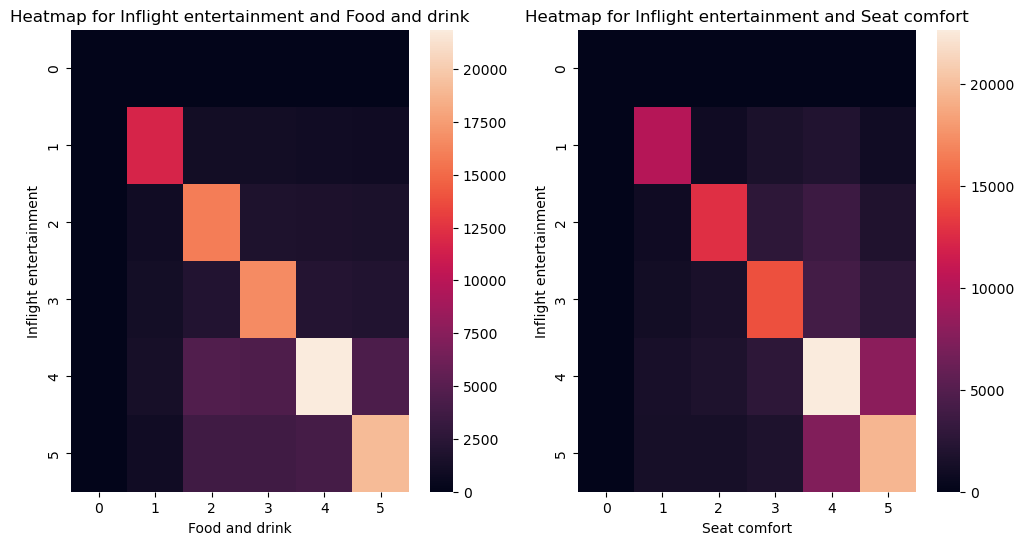

In [136]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
sns.heatmap(pd.crosstab(df["Inflight entertainment"], df["Food and drink"]), ax = ax0)
ax0.set_title("Heatmap for Inflight entertainment and Food and drink")
sns.heatmap(pd.crosstab(df["Inflight entertainment"], df["Seat comfort"]), ax = ax1)
ax1.set_title("Heatmap for Inflight entertainment and Seat comfort")
plt.show()

There is analysis of Ease of Online booking and Inflight wifi service left as their correlation is not empirically obvious.

Text(0.5, 1.0, 'Histogram for Inflight wifi service')

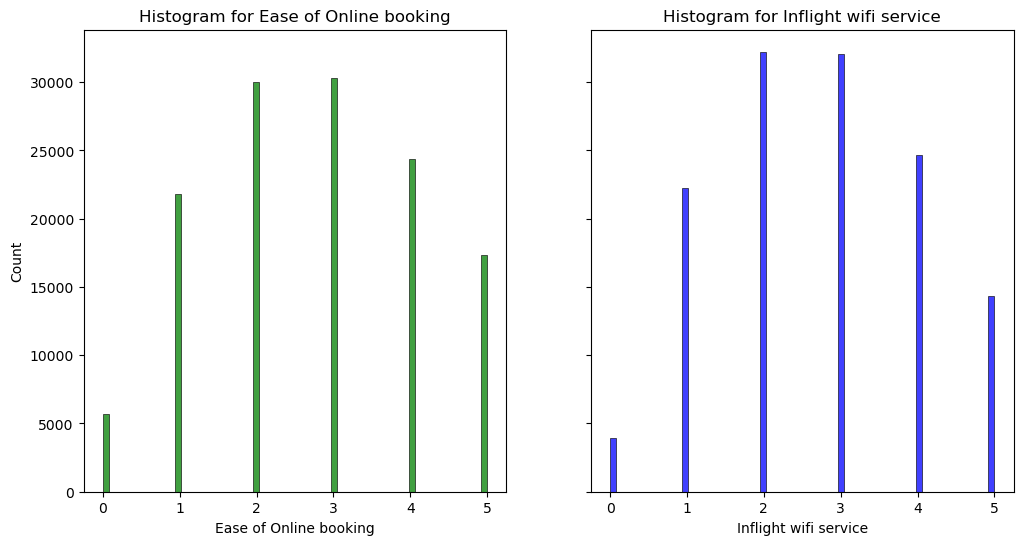

In [137]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6), sharey = True)
sns.histplot(data = df, x = "Ease of Online booking", ax = ax0, color = "green")
ax0.set_title("Histogram for Ease of Online booking")
sns.histplot(data = df, x = "Inflight wifi service", ax = ax1, color = "blue")
ax1.set_title("Histogram for Inflight wifi service")

In [138]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## KMeans clustering

It is unsupervised learning algorithm that gather some insights from the data. Clustering was used to obtain groups that are homogeneous intra cluster and heterogeneous compared to observations from other clusters. Variables that were used for clustering:  
- Age  
- Gender  
- Customer Type 
   
The disadventage of KMeans clustering algorithm is that number of clusters must be specified in advance. To specify the number of clusters Sihouette statistics were calculated - the highest silhouette width was obtained for 4 clusters. Due to silhouette width - KMeans was performed based on 4 clusters.

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 129487 non-null  int32   
 1   Gender                             129487 non-null  category
 2   Customer Type                      129487 non-null  category
 3   Age                                129487 non-null  int32   
 4   Type of Travel                     129487 non-null  category
 5   Class                              129487 non-null  category
 6   Flight Distance                    129487 non-null  int32   
 7   Inflight wifi service              129487 non-null  int32   
 8   Departure/Arrival time convenient  129487 non-null  int32   
 9   Ease of Online booking             129487 non-null  int32   
 10  Gate location                      129487 non-null  int32   
 11  Food and drink                 

In [140]:
columns_for_clustering = list()
for col in df.columns:
    if df[col].dtype == int and col != "Departure Delay in Minutes" and col != "Inflight entertainment" and col != "id":
        columns_for_clustering.append(col)
print(columns_for_clustering)

['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Arrival Delay in Minutes']


In [141]:
df_clust = df[columns_for_clustering]
scale = StandardScaler()
df_clust_scaled = scale.fit_transform(df_clust)

In [142]:
np.random.seed(123)
index = np.random.randint(df_clust_scaled.shape[0], size = 20000)
sample = df_clust_scaled[index, :]

Based on silhouette width 2 clusters should be chosen

In [143]:
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(sample)
    silhouette_avg = silhouette_score(sample, labels)
    print(f"For k={k}, Silhouette Score: {silhouette_avg}")

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k=2, Silhouette Score: 0.13902852502305926


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k=3, Silhouette Score: 0.13038147205514686


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k=4, Silhouette Score: 0.11987580628465835


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k=5, Silhouette Score: 0.11555341970829645


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k=6, Silhouette Score: 0.10801363791035365


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k=7, Silhouette Score: 0.11123717322565481


In [144]:
model = KMeans(n_clusters=2)
model.fit_predict(df_clust_scaled)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 0, ..., 1, 0, 0])

In [146]:
cluster_assignments = model.labels_
centroids = model.cluster_centers_
display(cluster_assignments)
display(centroids)


array([1, 1, 0, ..., 1, 0, 0])

array([[-0.13340043, -0.21307363, -0.39233336, -0.16138974, -0.29016494,
        -0.06118604, -0.46213103, -0.54504177, -0.57763817, -0.48468704,
        -0.38971593, -0.44717794, -0.36477073, -0.44976655, -0.56669334,
         0.04604678],
       [ 0.12316644,  0.19672741,  0.36223501,  0.14900852,  0.26790457,
         0.05649207,  0.42667806,  0.5032282 ,  0.53332392,  0.44750365,
         0.35981837,  0.41287211,  0.33678688,  0.41526214,  0.52321874,
        -0.04251424]])

In [147]:
df_clustering = df.copy()
df_clustering["clusters"] = cluster_assignments
display(df_clustering.head())


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,clusters
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,...,3,5,5,5,5,2,5,5,50,44,satisfied,1
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,...,5,4,4,4,4,3,4,5,0,0,satisfied,1
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,...,2,2,4,1,3,2,2,2,0,0,neutral or dissatisfied,0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,...,4,1,1,1,1,3,1,4,0,6,satisfied,0
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,...,2,2,2,2,2,4,2,4,0,20,satisfied,0


In [159]:
df_clustering.groupby(by = ["clusters"]).agg({"Flight Distance" : "mean", "Age" : "mean", "Departure/Arrival time convenient" : "median", 
                                              "Departure Delay in Minutes" : "mean", "Food and drink" : "median", "Inflight service" : "median", 
                                              "Seat comfort" : "median", "Cleanliness" : "median"})

,Flight Distance,Age,Departure/Arrival time convenient,Departure Delay in Minutes,Food and drink,Inflight service,Seat comfort,Cleanliness
clusters,,,,,,,,
0,977.381400,37.405125,3.0,16.188609,2.0,3.0,3.0,2.0
1,1386.773263,41.297730,4.0,13.216264,4.0,4.0,4.0,4.0


When we compare both clusters in terms of satisfaction with the flight we can see significant difference. There are much more people satisfied with the flight in the cluster 1 comparing to cluster 0. To see the relation check the visualization below

<Axes: xlabel='clusters', ylabel='count'>

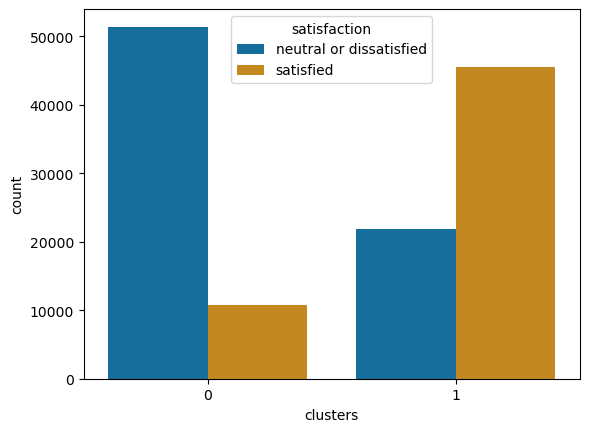

In [169]:
clusters_satisfaction = df_clustering.groupby(by = ["clusters"])["satisfaction"].value_counts().reset_index()
sns.barplot(data = clusters_satisfaction, x = "clusters", y = "count", hue = "satisfaction")

We can also see the differences in age of people attending flights between the clusters. In cluster 0 there is relatively high share of people in age 22-27 and 35-40 whereas in cluster 1 people at middle-age (40-60 years old).

<Axes: xlabel='clusters', ylabel='Age'>

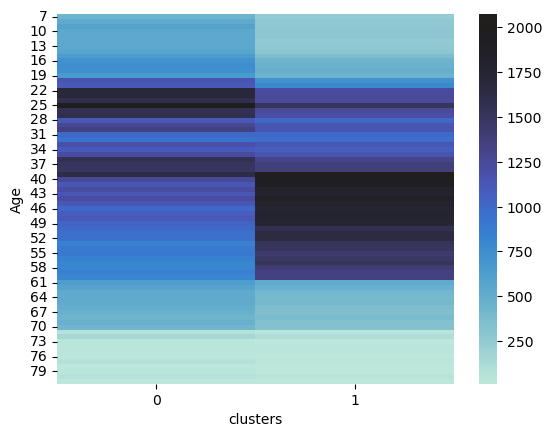

In [174]:
age_mapping = pd.crosstab(df_clustering["Age"], df_clustering["clusters"])
sns.heatmap(age_mapping, center= 2000)

Based on exploratory analysis of the clusters we can compare them in term of satisfaction with the flight. We will start with food and drink satisfaction. It can be observed that the highest share of people in cluster 1 rated Food and drink on 5 or 4 whereas for the first cluster it was 2 or 3. Median for variable Food and drink is 2 in the first cluster and 4 in the second cluster so it means that half of people evaluate food and drink on the maximum level of 2 in the first cluster.

<Axes: xlabel='clusters', ylabel='Food and drink'>

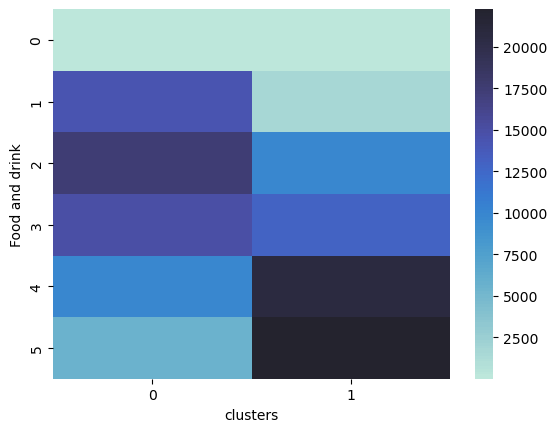

In [181]:
fd_mapping = pd.crosstab(df_clustering["Food and drink"], df_clustering["clusters"])
sns.heatmap(fd_mapping, center = 25000)

Similar conclusions we get for cleanliness satisfaction analysis. The heatmap is presented below.

<Axes: xlabel='clusters', ylabel='Cleanliness'>

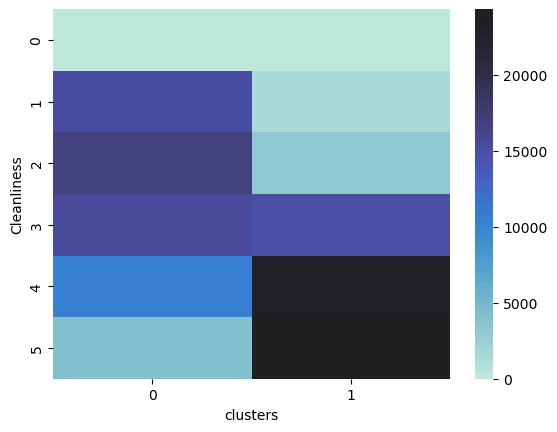

In [182]:
clean_mapping = pd.crosstab(df_clustering["Cleanliness"], df_clustering["clusters"])
sns.heatmap(clean_mapping, center = 25000)

From the heatmap we can see that greatest share of people in cluster 1 evaluate Cleanliness on high level (4/5) whereas in cluster 0 customers are not exactly satisfied with cleanliness in the plane (most of people go for 2)